# Podstawy Sztucznej Inteligencji - Projekt Kacper Marzol

Celem tego projektu jest klasyfikacja piosenek na podstawie ich kilku cech. Zbiór danych składa się z 278 tysięcy piosenek z serwisu Spotify.

In [1]:
import pandas as pd

data = pd.read_csv("278k_labelled_uri.csv")
print(data.shape)
data.head()

(277938, 15)


,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx


In [2]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'duration (ms)', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'spec_rate', 'labels', 'uri'],
      dtype='object')

Acousticness: miara akustyczności od 0 do 1
Danceability: miara taneczności od 0 do 1
Energy: miara energiczności od 0 do 1
Instrumentalness: miara instrumentalności od 0 do 1
Liveness: miara obecności publiki w nagraniu od 0 do 1
Loudness: miara głośnośći w decybelach (-60 do 0 decybeli)
Speechiness: miara słów w piosence od 0 do 1
Valence: miara od 0 do 1 opisująca pozytywność przekazywaną przez piosenkę
Tempo: tempo piosenki w BMP (uderzeń na minutę)

In [33]:
data.labels.value_counts()

1    106429
0     82058
2     47065
3     42386
Name: labels, dtype: int64

0 - piosenka smutna
1 - piosenka wesoła
2 - piosenka energetyczna
3 - piosenka spokojna

Usuniemy zbędne kolumny, "uri", ponieważ URL piosenki nie jest potrzebny oraz dwie pierwsze kolumny

In [3]:
cols=["Unnamed: 0.1", "Unnamed: 0","uri"]
data=data.drop(cols ,axis=1)

In [4]:
data.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


Dodamy trochę nanów do zbioru

In [30]:
from sklearn.model_selection import train_test_split
import numpy as np
import random

X = data.drop('labels', axis=1)
y = data.labels

ix = [(row, col) for row in range(X.shape[0]) for col in range(X.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    X.iat[row, col] = np.nan

X.isna().sum()

duration (ms)       27712
danceability        27601
energy              27660
loudness            27863
speechiness         27847
acousticness        28040
instrumentalness    27797
liveness            27539
valence             28071
tempo               27836
spec_rate           27766
dtype: int64

Podzielimy zbiór na część treningową, walidacyjną i testową:

In [31]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(X_val.shape)

(222350, 11)
(222350,)
(27794, 11)
(27794, 11)


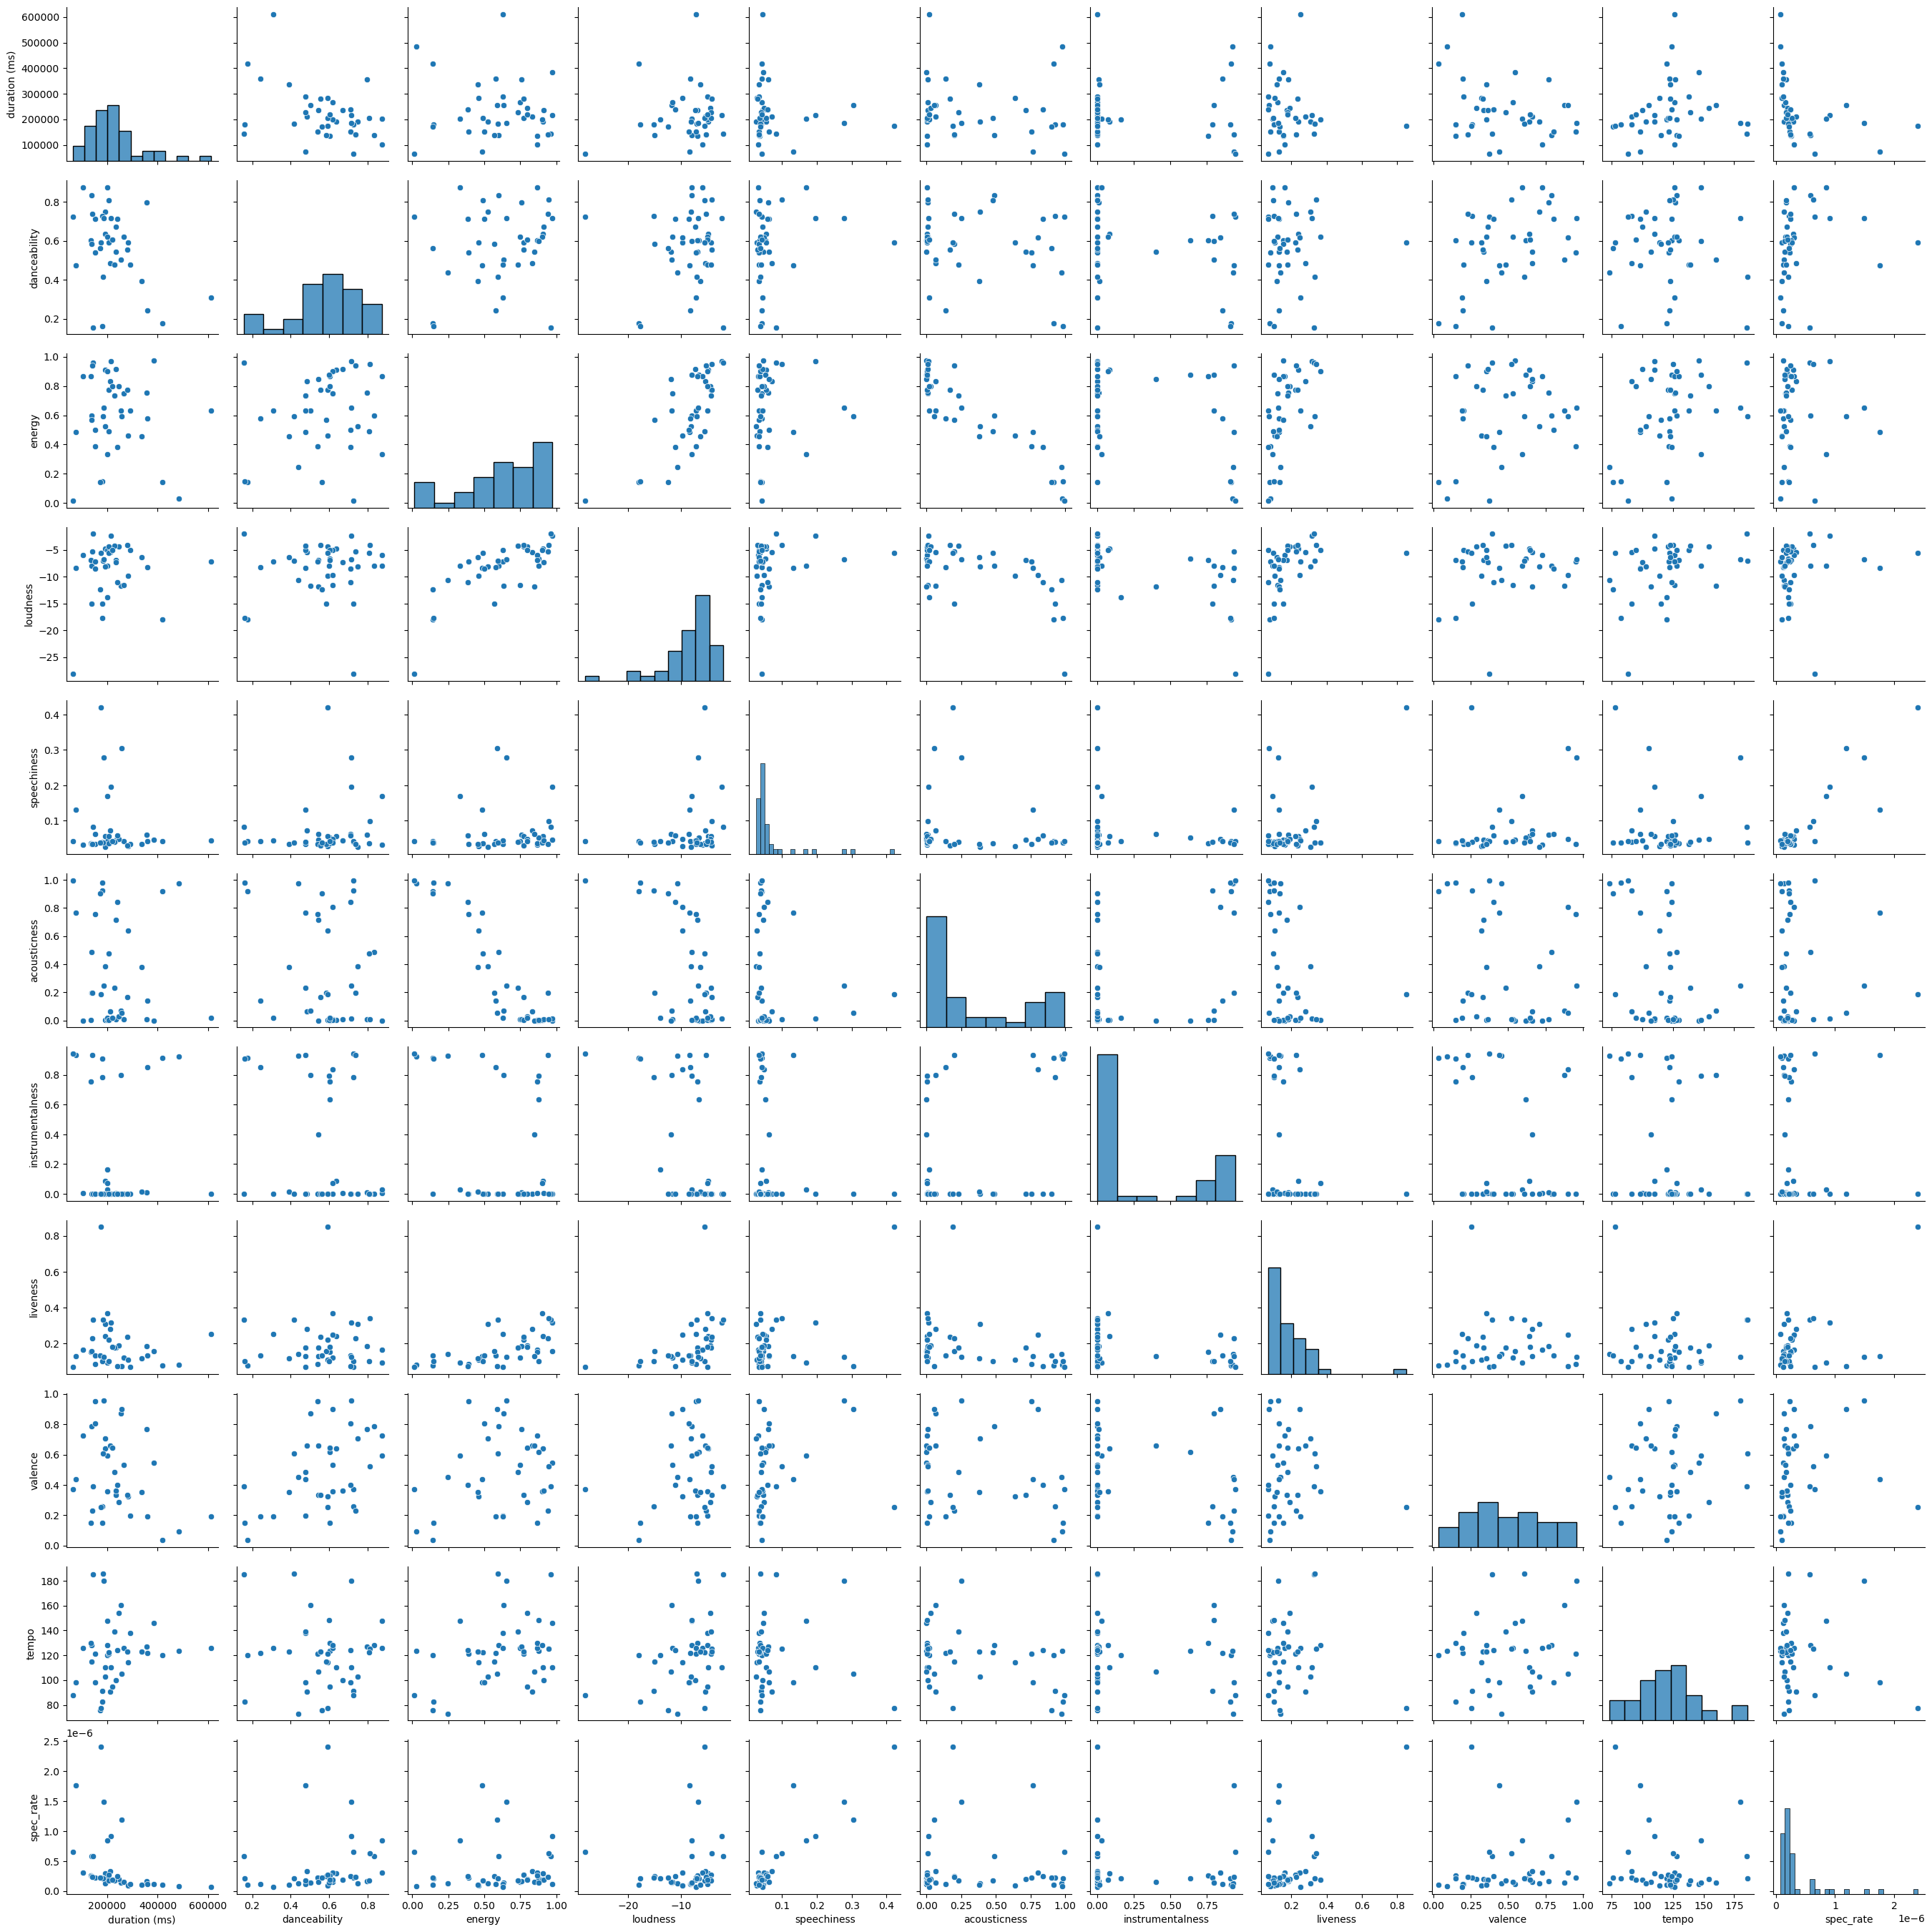

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

xplot=X_train.iloc[:50, :]
sns.pairplot(xplot)
plt.show()

Nauczymy kilka modeli

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pipeline = Pipeline([("imputer", SimpleImputer(strategy="median"))])

# Logistic Regression

In [81]:
models=[]
scores=[]

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics

def make_pipeline(model, model_name):
    return Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler()),  (model_name, model)])

def test (model, model_name,param_grid):
    pipe=make_pipeline(model, model_name)
    search=GridSearchCV(pipe, param_grid)
    search.fit(X_train, y_train)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)
    models.append(model)
    scores.append(model.evaluate())




4

In [73]:
from sklearn.linear_model import LogisticRegression


# scaler = StandardScaler()
# modelLogistic = LogisticRegression(max_iter=10000)
# pipe = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),("scaler", scaler),  ("logistic", modelLogistic)])

param_grid = {
    "logistic__C": np.logspace(-4, 4, 4)
}

search = GridSearchCV(pipe, param_grid)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.798):
{'logistic__C': 0.046415888336127774}
Best parameter (CV score=0.798):
{'logistic__C': 0.046415888336127774}


In [78]:
2+2

4